In [1]:
import tensorflow as tf
import coco_helper as ch
from config import *
import numpy as np
import pickle
import glob
import matplotlib.pyplot as plt

In [2]:
canvas=tf.constant(np.zeros((10,10)))

In [3]:
small=tf.constant(np.ones((3,3)))

In [51]:
indices=tf.constant([[3,3],[3,4]])
updates=tf.ones([2])*3
shape=tf.constant((10,10))

tf.scatter_nd(    indices,    updates,    shape)

<tf.Tensor: id=225, shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 3., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [72]:
indices=tf.constant([[3]])
updates=tf.ones([1,10])*3
shape=tf.constant((10,10))

tf.scatter_nd(    indices,    updates,    shape)

<tf.Tensor: id=306, shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [61]:
shape.shape.rank

1

In [65]:
t = tf.constant([[1, 2, 3], [4, 5, 6]])
paddings = tf.constant([[3,0], [5, 0]])
# 'constant_values' is 0.
# rank of 't' is 2.
tf.pad(t, paddings, "CONSTANT")

<tf.Tensor: id=277, shape=(5, 8), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 2, 3],
       [0, 0, 0, 0, 0, 4, 5, 6]])>

In [69]:
indices = tf.constant([[0], [2]])
updates = tf.constant([
                       [[5, 5, 5, 5], [6, 6, 6, 6],[7, 7, 7, 7], [8, 8, 8, 8]],
                       [[5, 5, 5, 5], [6, 6, 6, 6],[7, 7, 7, 7], [8, 8, 8, 8]] 
                    ],dtype=tf.float32)
tensor = tf.ones([4, 4, 4],dtype=tf.float32)
updated = tf.tensor_scatter_nd_update(tensor, indices, updates)

In [70]:
updated

<tf.Tensor: id=298, shape=(4, 4, 4), dtype=float32, numpy=
array([[[5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)>

In [4]:
spot_size=600
middle=int(spot_size/2)
x=tf.range(spot_size,dtype=tf.float32)
y=tf.range(spot_size,dtype=tf.float32)
xx,yy=tf.meshgrid(x,y)
spot_grid=tf.stack((xx,yy),axis=-1)
center=tf.constant((middle,middle),dtype=tf.float32)

In [5]:
ortho_dists=spot_grid-center
dist=tf.linalg.norm(ortho_dists,axis=-1)
sigma=10
gaussian=tf.exp((-dist/sigma))
#gaussian=tf.expand_dims(gaussian,-1)

In [6]:
gaussian

<tf.Tensor: id=46, shape=(600, 600), dtype=float32, numpy=
array([[3.7535794e-19, 4.0283704e-19, 4.3227668e-19, ..., 4.6381294e-19,
        4.3227668e-19, 4.0283704e-19],
       [4.0283704e-19, 4.3237894e-19, 4.6403240e-19, ..., 4.9794422e-19,
        4.6403240e-19, 4.3237894e-19],
       [4.3227668e-19, 4.6403240e-19, 4.9806204e-19, ..., 5.3452194e-19,
        4.9806204e-19, 4.6403240e-19],
       ...,
       [4.6381294e-19, 4.9794422e-19, 5.3452194e-19, ..., 5.7372094e-19,
        5.3452194e-19, 4.9794422e-19],
       [4.3227668e-19, 4.6403240e-19, 4.9806204e-19, ..., 5.3452194e-19,
        4.9806204e-19, 4.6403240e-19],
       [4.0283704e-19, 4.3237894e-19, 4.6403240e-19, ..., 4.9794422e-19,
        4.6403240e-19, 4.3237894e-19]], dtype=float32)>

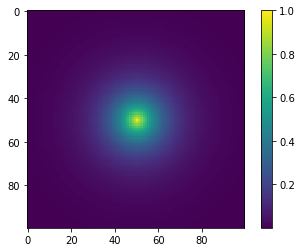

In [153]:
plt.imshow(gaussian)
plt.colorbar()

In [154]:
target_size=300
smaller_window=target_size-middle

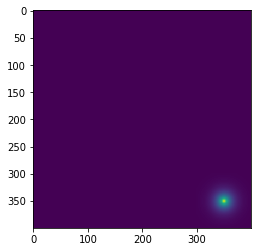

In [161]:
x_coord=300
y_coord=300
#corrected_x_coord=x_coord+middle
#corrected_y_coord=y_coord+middle

paddings=[[x_coord,target_size-x_coord],[y_coord,target_size-y_coord]]
paddings=tf.constant(paddings)

placed=tf.pad(gaussian,paddings,"CONSTANT")
plt.imshow(placed)

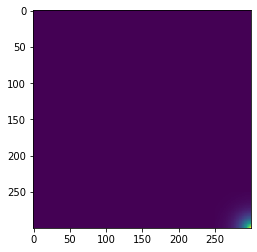

In [162]:
cropped=placed[middle:-middle,middle:-middle]
plt.imshow(cropped)

<tf.Tensor: id=1016, shape=(300, 300), dtype=float32, numpy=
array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.6542511, 0.6972891,
        0.7288934],
       [0.       , 0.       , 0.       , ..., 0.6972891, 0.7536383,
        0.7996295],
       [0.       , 0.       , 0.       , ..., 0.7288934, 0.7996295,
        0.8681235]], dtype=float32)>

In [206]:
spot_size=50
middle=int(spot_size/2)
x=tf.range(spot_size,dtype=tf.float32)
y=tf.range(spot_size,dtype=tf.float32)
xx,yy=tf.meshgrid(x,y)
spot_grid=tf.stack((xx,yy),axis=-1)
center=tf.constant((middle,middle),dtype=tf.float32)

ortho_dists=spot_grid-center
dist=tf.linalg.norm(ortho_dists,axis=-1)
sigma=10
gaussian=tf.exp((-dist/sigma))

IMAGE_SIZE=(300,300)

@tf.function
def draw_spots_v6(coords):
    x_coord=coords[0]
    y_coord=coords[1]
    
    paddings=[[x_coord,target_size-x_coord],[y_coord,target_size-y_coord]]
    paddings=tf.constant(paddings)

    placed=tf.pad(gaussian,paddings,"CONSTANT")
    cropped=placed[middle:-middle,middle:-middle]
    return cropped

In [208]:
%timeit draw_spots_v6((100,100))

356 µs ± 22.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [234]:
y_grid=tf.range(300,dtype=tf.float32)
x_grid=tf.range(300,dtype=tf.float32) 

xx,yy=tf.meshgrid(y_grid,x_grid)
grid=tf.stack((xx,yy),axis=-1)

@tf.function
def kpt_dist(kpt):
    ortho_dist=grid-kpt
    dist=tf.linalg.norm(ortho_dist,axis=-1)
    #return tf.exp((-dist/sigma))
    return dist

In [198]:
%timeit kpt_dist((100,100))

960 µs ± 27.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


It's definitly an optimization, by a factor of 3

In [214]:
def draw_spot_v7(coords):
    x_coord=coords[0]
    y_coord=coords[1]
    x_idx=tf.range(x_coord-middle,x_coord+middle)
    y_idx=tf.range(y_coord-middle,y_coord+middle)
    indices=tf.stack(tf.meshgrid(y_idx,x_idx),axis=-1)
    
    return tf.scatter_nd(    indices,    gaussian,    (300,300))

In [216]:
%timeit draw_spot_v7((100,100))

1.46 ms ± 9.98 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
spot_size=600
middle=int(spot_size/2)
x=tf.range(spot_size,dtype=tf.float32)
y=tf.range(spot_size,dtype=tf.float32)
xx,yy=tf.meshgrid(x,y)
spot_grid=tf.stack((xx,yy),axis=-1)
center=tf.constant((middle,middle),dtype=tf.float32)

ortho_dists=spot_grid-center
dist=tf.linalg.norm(ortho_dists,axis=-1)
sigma=10
gaussian=tf.exp((-dist/sigma))

image_sizes=tf.constant((300,300),dtype=tf.int32)

@tf.function
def draw_spot_v8(coords):
    #using slice from a larger canvas
    inverse_coords=image_sizes-coords
    return gaussian[inverse_coords[1]:inverse_coords[1]+image_sizes[1],inverse_coords[0]:inverse_coords[0]+image_sizes[0]]

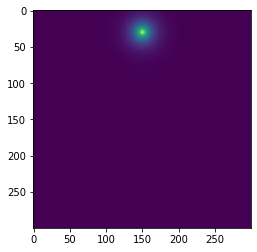

In [21]:
coords=tf.constant((150,30),dtype=tf.int32)
plt.imshow(draw_spot_v8(coords))

In [24]:
%timeit draw_spot_v8(coords)

291 µs ± 24.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Fastest version!

Using the scatter_nd is suprisingly the slowest, probably becuase of the meshgrid generations

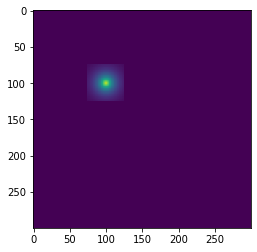

In [217]:
plt.imshow(draw_spot_v7((100,100)))

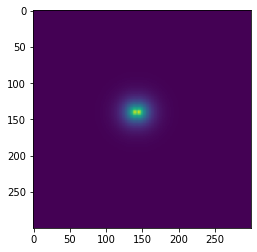

In [245]:
a=tf.constant((140,140),dtype=tf.float32)
b=tf.constant((145,140),dtype=tf.float32)

ga=kpt_dist(a)
gb=kpt_dist(b)
st=tf.stack((ga,gb))

r1m=tf.reduce_min( st,axis=0)
r1=tf.exp((-r1m/sigma))
plt.imshow(r1)

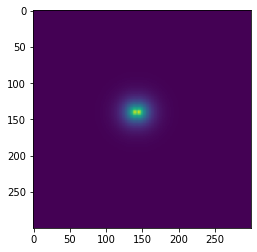

In [247]:
a=tf.constant((140,140),dtype=tf.float32)
b=tf.constant((145,140),dtype=tf.float32)

da=kpt_dist(a)
ga=tf.exp((-da/sigma))
db=kpt_dist(b)
gb=tf.exp((-db/sigma))
st=tf.stack((ga,gb))

r2=tf.reduce_max( st,axis=0)

plt.imshow(r2)

In [249]:
 np.all((r2==r1).numpy())

True